# Julia 基礎圖表繪製: 圖表結合敘述統計

本範例需要使用到的套件有 StatsBase，請在執行以下範例前先安裝。

```
] add StatsBase
```

In [3]:
using Pkg
Pkg.add("StatsBase")

  Resolving package versions...
   Updating `C:\Users\ocean_chou\.julia\environments\v1.4\Project.toml`
  [2913bbd2] + StatsBase v0.32.2
   Updating `C:\Users\ocean_chou\.julia\environments\v1.4\Manifest.toml`
 [no changes]


In [4]:
using StatsBase, RDatasets
using Gadfly
import Cairo, Fontconfig

## 鉛直線與水平線

In [5]:
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


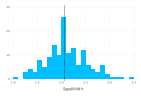

In [6]:
p = plot(iris, x="SepalWidth", xintercept=[mean(iris[!, :SepalWidth])],
    Geom.vline(color=["black"]), Geom.histogram)

## 斜線

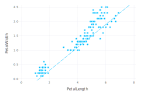

In [7]:
p = plot(iris, x="PetalLength", y="PetalWidth", Geom.point,
    intercept=[-0.5], slope=[0.4], Geom.abline(style=:dash))

In [8]:
draw(PNG("abline.png", 12cm, 9cm), p)

## 資料點標籤

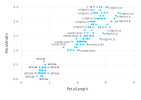

In [9]:
p = plot(iris, x="PetalLength", y="PetalWidth", Geom.point,
    label="Species", Geom.label)

In [10]:
draw(PNG("label.png", 12cm, 9cm), p)

## 子圖

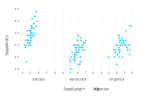

In [11]:
p = plot(iris, xgroup="Species", x="SepalLength", y="SepalWidth", Geom.subplot_grid(Geom.point))

In [12]:
draw(PNG("subplot.png", 12cm, 9cm), p)